In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Text(0,0.5,'lukumäärä')

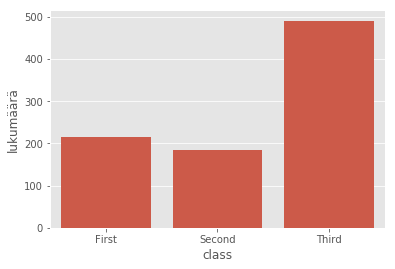

In [3]:
ax=sns.countplot(x='class', data=titanic, color='C0')
ax.set_ylabel('lukumäärä')

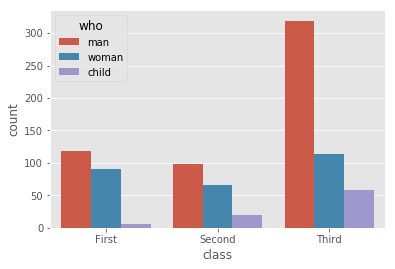

In [4]:
sns.countplot(x='class', hue='who', data=titanic)

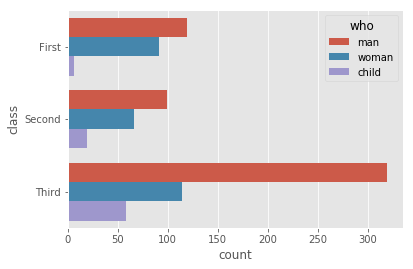

In [5]:
sns.countplot(y='class', hue='who', data=titanic)

C:\Users\Aki\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


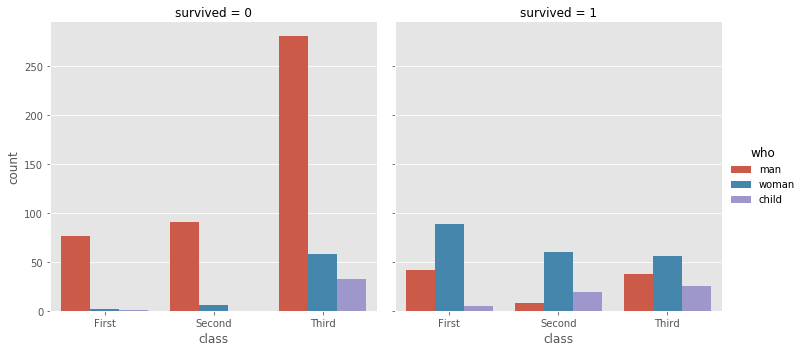

In [6]:
sns.factorplot(x='class', hue='who', data=titanic, col='survived', kind='count')

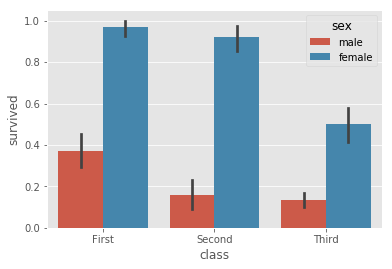

In [7]:
sns.barplot(x='class', y='survived', hue='sex', data=titanic)

In [8]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


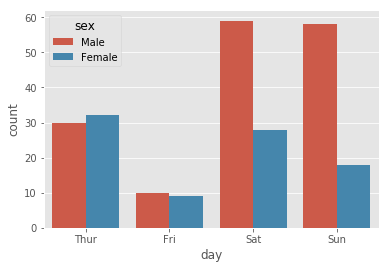

In [9]:
sns.countplot(x='day', hue='sex', data=tips)

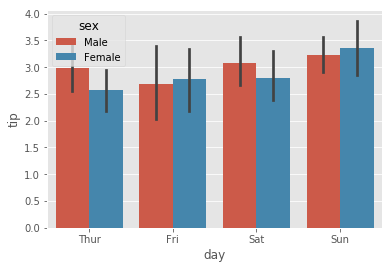

In [10]:
sns.barplot(x='day', y='tip', hue='sex', data=tips)

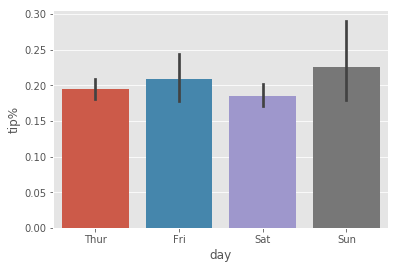

In [11]:
tips['tip%'] = tips['tip']/(tips['total_bill']-tips['tip'])
sns.barplot(x='day', y='tip%', data=tips)

In [12]:
df = pd.read_excel('http://taanila.fi/data1.xlsx', sheet_name = 'Data')
df.head()

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN


In [13]:
df1=df[['johto', 'työtov', 'työymp', 'palkkat', 'työteht']]
df1.head()

,johto,työtov,työymp,palkkat,työteht
0,3,3.0,3,3,3
1,1,5.0,2,1,3
2,3,4.0,1,1,3
3,3,3.0,3,3,3
4,2,3.0,2,1,2


Text(0.5,0,'1=erittäin tyytymätön - 5=erittäin tyytyväinen')

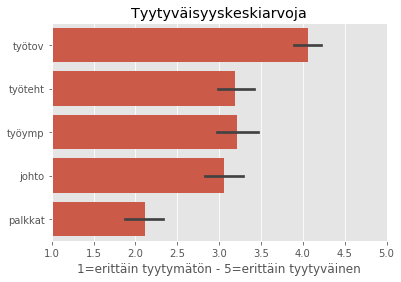

In [14]:
ax=sns.barplot(data=df1, orient='h', color='C0', order=['työtov','työteht','työymp','johto','palkkat'])
ax.set_xlim(1, 5)
ax.set_title('Tyytyväisyyskeskiarvoja')
ax.set_xlabel('1=erittäin tyytymätön - 5=erittäin tyytyväinen')